Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option("display.max_colwidth", 40)
import numpy as np
import os
import re
import operator
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# visualization
import matplotlib.pyplot as plt

# magic command
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zigfridzvezdin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load  Data

In [2]:
df = pd.read_csv('AllReviewsCleanTokens.csv')
data = df.tokens

In [3]:
data.head()

0    ['enjoy', 'wonderful', 'stay', 'long...
1    ['long', 'weekend', 'break', 'book',...
2    ['stay', 'fri', 'fir', 'area', '45',...
3    ['center', 'parcs', 'longleat', 'num...
4    ['like', 'many', 'people', 'would', ...
Name: tokens, dtype: object

In [4]:
# the lemmantized_reviews are interpreted as a string by the read_csv command. We convert it into a list. 
data = data.str.replace(r"[\[\]\']", "").str.split(", ")
data.head()

0    [enjoy, wonderful, stay, longleat, c...
1    [long, weekend, break, book, 8, frid...
2    [stay, fri, fir, area, 45, minute, w...
3    [center, parcs, longleat, numerous, ...
4    [like, many, people, would, seem, br...
Name: tokens, dtype: object

In [5]:
cleaned_docs = list(data)

## Use word2vec considering our dataset vocabulary

In [6]:
my_q = 300 # to match dim of GNews word vectors
mcount = 50 # minimal word frequency  

w2v = Word2Vec(size = my_q, min_count = mcount)
w2v.build_vocab(cleaned_docs)

Load Google vectors corresponding to our vocabulary

In [7]:
w2v.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary = True)

In [8]:
w2v['parcs'].shape

(300,)

In [9]:
def my_vector_getter(word, wv) :
    # returns the vector of a word
    try:
        # we use reshape because cosine similarity in sklearn now works only for multidimensional arrays
        word_array = wv[word].reshape(1,-1)
        return word_array
    except KeyError:
        print('word: <', word, '> not in vocabulary!')

In [10]:
my_vector_getter('parcs', w2v).shape

(1, 300)

Let's look for a word missing from our vocabulary

In [11]:
my_vector_getter('eagle', w2v)

word: < eagle > not in vocabulary!


Some (cosine) similarities examples :

In [12]:
print(w2v.similarity('shower', 'bathroom'))
print(w2v.similarity('parcs', 'parc'))
print(w2v.similarity('great', 'good'))

-3.689349e+19
-3.689349e+19
3.689349e+19


In [31]:
print(w2v.similarity('parcs', 'accommodation'))

-1.0842022e-19


Let's return the most similar words !

In [13]:
w2v.similar_by_word('shower')

[('bathroom', 0.6207695007324219),
 ('bath', 0.5871196389198303),
 ('tub', 0.5430082082748413),
 ('toilet', 0.5051549673080444),
 ('jacuzzi', 0.49551501870155334),
 ('sauna', 0.4805178642272949),
 ('wash', 0.46883711218833923),
 ('towel', 0.46487686038017273),
 ('downstairs', 0.4630371332168579),
 ('bed', 0.45729708671569824)]

In [14]:
w2v.similar_by_word('parcs')

[('parc', 0.4865573048591614),
 ('accommodation', 0.4269517958164215),
 ('leisure', 0.3979206681251526),
 ('tlc', 0.39526769518852234),
 ('haut', 0.3936243951320648),
 ('accomodation', 0.38739755749702454),
 ('amis', 0.38513052463531494),
 ('magasin', 0.3842311501502991),
 ('partout', 0.37427258491516113),
 ('spa', 0.37402230501174927)]

What are analogies found for the vector v = w2v['hotel'] - w2v['bed'] ?

In [15]:
w2v.most_similar(positive = ['room'], negative = ['bed'])

[('hall', 0.3183954358100891),
 ('spacious', 0.24434278905391693),
 ('space', 0.22608470916748047),
 ('plenty', 0.22357279062271118),
 ('upstairs', 0.21837681531906128),
 ('lounge', 0.21554088592529297),
 ('session', 0.192834734916687),
 ('accomadation', 0.1896750032901764),
 ('venue', 0.18933255970478058),
 ('atmosphere', 0.1870124787092209)]

### Visualize word embeddings of most frequents words

In [16]:
all_tokens = [token for sublist in cleaned_docs for token in sublist]
t_counts = dict(Counter(all_tokens))
len(t_counts)

22019

In [17]:
n_most_fqt = 200
sorted_t_counts = sorted(t_counts.items(), key = operator.itemgetter(1), reverse = True)
mft = [elt[0] for elt in sorted_t_counts[:n_most_fqt]]

In [18]:
mft

['time',
 'go',
 'good',
 'great',
 'get',
 'pool',
 'parcs',
 'would',
 'stay',
 'lodge',
 'activity',
 'one',
 'book',
 'year',
 'day',
 'family',
 'staff',
 'really',
 'visit',
 'longleat',
 'take',
 'center',
 'clean',
 'area',
 'food',
 'well',
 'child',
 'also',
 'villa',
 'swim',
 'back',
 'holiday',
 'make',
 'even',
 'need',
 'service',
 'park',
 'love',
 'accommodation',
 'much',
 'lovely',
 'expensive',
 'enjoy',
 'price',
 'could',
 'walk',
 'break',
 'place',
 'lot',
 'centre',
 '2',
 'bike',
 'restaurant',
 'like',
 'come',
 'eat',
 'pay',
 'room',
 'kid',
 'find',
 'around',
 'little',
 'use',
 'old',
 'think',
 'train',
 '3',
 'first',
 'car',
 'look',
 'excellent',
 'parc',
 'say',
 'fun',
 'bite',
 'thing',
 'night',
 'want',
 'nice',
 'tre',
 '4',
 'bed',
 'week',
 'return',
 'people',
 'weekend',
 'every',
 'two',
 'sport',
 'everything',
 'leave',
 'site',
 'however',
 'always',
 'spend',
 'friendly',
 'new',
 'amp',
 'next',
 'money',
 'quite',
 'experience',
 'al

Store the vectors of the most frequent words in numpy array

In [19]:
mft_vecs = np.zeros((n_most_fqt, my_q))

for idx,token in enumerate(mft):
    mft_vecs[idx,:] = w2v[token]

In [20]:
mft_vecs.shape

(200, 300)

Visualizing Data using t-SNE :
-  Original article : http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
- Scikit-Learn documentation : https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

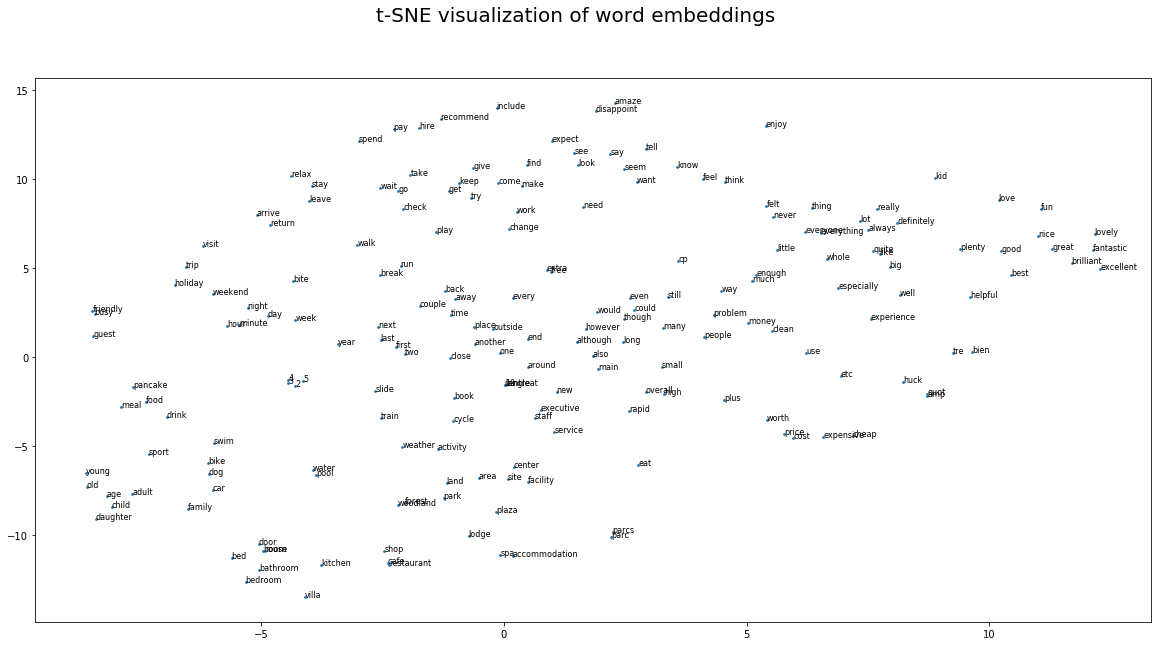

In [21]:
my_pca = PCA(n_components=10)
my_tsne = TSNE(n_components=2)

mft_vecs_pca = my_pca.fit_transform(mft_vecs)
mft_vecs_tsne = my_tsne.fit_transform(mft_vecs_pca)

plt.figure(figsize=(20, 10))
fig, ax = plt.subplots()
ax.scatter(mft_vecs_tsne[:,0], mft_vecs_tsne[:,1],s=3)
for x, y, token in zip(mft_vecs_tsne[:,0] , mft_vecs_tsne[:,1], mft):     
    ax.annotate(token, xy=(x, y), size=8)
fig.suptitle('t-SNE visualization of word embeddings',fontsize=20)
fig.set_size_inches(20,10)
fig.savefig('word_embeddings.png',dpi=300)
fig.show()

## Use word2vec considering all Google word vectors
Let's compare !

In [22]:
wv_from_bin = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary = True)

In [23]:
wv_from_bin.similar_by_word('parcs')

[('Keycamp', 0.7030531167984009),
 ('Siblu', 0.6702446937561035),
 ('Eurocamp', 0.6518019437789917),
 ('gites', 0.6129817962646484),
 ('Canvas_Holidays', 0.6082348823547363),
 ('catered_chalet', 0.6071932315826416),
 ('www.kuoni.co.uk', 0.5980793237686157),
 ('gîtes', 0.5975005626678467),
 ('catered_chalets', 0.5936937928199768),
 ("chambres_d'", 0.5907391309738159)]

Running time is far longer but we can remark important differences among most similar words !
### Document similarity
In vector space ('bag-of-words' representation)

In [24]:
stpwds = stopwords.words('english')

In [25]:
s_1 = 'computer science is the study of the design and use of computers'
s_2 = 'programming language theory considers various approaches to the description of computation'

s_1 = [elt for elt in s_1.split(' ') if elt not in stpwds]
s_2 = [elt for elt in s_2.split(' ') if elt not in stpwds]

print(s_1)
print(s_2)

['computer', 'science', 'study', 'design', 'use', 'computers']
['programming', 'language', 'theory', 'considers', 'various', 'approaches', 'description', 'computation']


In [26]:
features = list(set(s_1).union(set(s_2)))

# project the two sentences in the vector space
p_1 = [1 if feature in s_1 else 0 for feature in features]
p_2 = [1 if feature in s_2 else 0 for feature in features]

p_1_print = list(zip(features, p_1))
p_2_print = list(zip(features, p_2))

print('=== vector space representation of sentence 1 : ===')
print(p_1_print, '\n')
print('=== vector space representation of sentence 2 : ===')
print(p_2_print, '\n')

print('similarity of sentences 1 and 2 in vector space:', 
      cosine_similarity(np.array(p_1).reshape(1,-1),np.array(p_2).reshape(1,-1)))

=== vector space representation of sentence 1 : ===
[('science', 1), ('description', 0), ('various', 0), ('computation', 0), ('computer', 1), ('approaches', 0), ('considers', 0), ('language', 0), ('programming', 0), ('design', 1), ('use', 1), ('study', 1), ('theory', 0), ('computers', 1)] 

=== vector space representation of sentence 2 : ===
[('science', 0), ('description', 1), ('various', 1), ('computation', 1), ('computer', 0), ('approaches', 1), ('considers', 1), ('language', 1), ('programming', 1), ('design', 0), ('use', 0), ('study', 0), ('theory', 1), ('computers', 0)] 

similarity of sentences 1 and 2 in vector space: [[0.]]


No similarity found in the vector space induced by bag-of-words representation !

In word embeddings space : naive document embeddings by word vector averaging :

In [27]:
p_1_embeddings = np.concatenate([wv_from_bin[token].reshape(1,-1) for token in s_1])
p_2_embeddings = np.concatenate([wv_from_bin[token].reshape(1,-1) for token in s_2])

# naive approach: centroids
centroid_1 = np.mean(p_1_embeddings, axis=0).reshape(1,-1)
centroid_2 = np.mean(p_2_embeddings, axis=0).reshape(1,-1)

print('similarity of centroids of sentences 1 and 2 in word embeddings space:', cosine_similarity(centroid_1, centroid_2))

similarity of centroids of sentences 1 and 2 in word embeddings space: [[-2.]]


It is already better !